In [11]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, OptimizeWarning

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=OptimizeWarning)

# DEFININDO AS FUNÇÕES

In [12]:
def curveFit(xData, yData, function):
    coef = curve_fit(function, xData, yData, maxfev=2100000000)
    return list(coef[0])

def getFitPrecision(xData, yData, function, coef):
    residuals = yData - function(xData, *coef)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((yData - np.mean(yData))**2)
    return 1 - (ss_res / ss_tot)

def plotFunction(xData, yData, function, functionName='Function'):
    coef     = curveFit(xData, yData, function)
    prec     = getFitPrecision(xData, yData, function, coef)

    xTest = np.linspace(min(xData), max(xData), 100000)
    yTest = function(xTest, *coef)

    plt.scatter(xData, yData, color='orange')
    plt.plot(xTest, yTest, color='blue', linewidth=2.5)
    plt.title(f'{functionName} - {prec*100:.2f}%')
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.grid()

def testFunctions():
    def funcaoLinear(x, a, b):
        return a*x + b

    def funcaoExponencial(x, a, b, c, d, e):
        return a*b**(c*x + d) + e

    def funcaoExponencialSuporte(x, Yo, Xo, M, k, Fo):
        A = (M - Yo) / Yo
        return M / (1 + A*np.e**(-k*(x - Xo))) + Fo

    def funcaoLogaritmica(x, a, b, c):
        return a*np.log(x + b) + c

    def funcaoQuadratica(x, a, b, c):
        return a*x**2 + b*x + c

    def funcaoCubica(x, a, b, c, d):
        return a*x**3 + b*x ** 2 + c*x + d

    def polinomio(x, a, b, c, d, e, f , g, h, i, j, k):
        return a*x**10 + b*x**9 + c*x**8 + d*x**7 + e*x**6 + f*x**5 + g**4 + h*x**3 + i*x**2 + j*x + k

    def funcaoPotencia(x, a, b, c):
        return a*x**b + c

    def funcaoRaiz(x, a, b, c, d):
        return a*np.sqrt(b*x + c) + d

    def funcaoSeno(x, a, b, c, d):
        return a * np.sin(b * (x + c)) + d

    def funcaoTangente(x, a, b, c, d):
        return a * np.tan(b * (x - d)) + c

    def funcaoHiperbole(x, a, b, c, n, d):
        return (a) / (b * x + c)**n + d

    def funcaoNormal(x, a, media, desvio):
        return (a) / (desvio * ((2 * np.pi) ** (0.5))) * (np.e ** (-1 * ((x - media) ** 2) / (2 * (desvio ** 2))))

    def FuncaoSenoideQuadratica(x, a, b, c, d, e, f, g):
        return a*(x + b)**2 - c*(x + d)*np.cos(e*x) + f * x + g

    def polinomioComplexo(x, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o):
        return a*x**b + c*x**d + e*x**f + g*x**h + i*x**j + k*x**l + m*x**n + o

    return {
        'Função Linear': funcaoLinear,
        'Função Exponencial': funcaoExponencial,
        'Função Exponencial Suporte': funcaoExponencialSuporte,
        'Função Logaritmica': funcaoLogaritmica,
        'Função Quadrática': funcaoQuadratica,
        'Função Cúbica': funcaoCubica,
        'Polinomio': polinomio,
        'Função Potência': funcaoPotencia,
        'Função Raiz': funcaoRaiz,
        'Função Seno': funcaoSeno,
        'Função Tangente': funcaoTangente,
        'Função Hiperbólica': funcaoHiperbole,
        'Função Normal': funcaoNormal,
        'Função Senoide Quadrática': FuncaoSenoideQuadratica,
        'Polinomio Complexo': polinomioComplexo
    }

def plotAllFunctions(xData, yData):
    functions = testFunctions()
    size = len(functions)
    plt.figure(figsize=(20, 6*size))

    for i, (key, value) in enumerate(functions.items()):
        plt.subplot(size, 3, i+1)
        plotFunction(xData, yData, value, functionName=key)

# TESTANDO O MODELO

In [13]:
df = pd.read_excel('DataBase.xlsx')
display(df.head())

xData = df['Tempo'].to_numpy()
yData = df['Valor'].to_numpy()

,Tempo,Valor
0,0,19.0
1,1,22.5
2,2,29.0
3,3,35.0
4,4,46.0


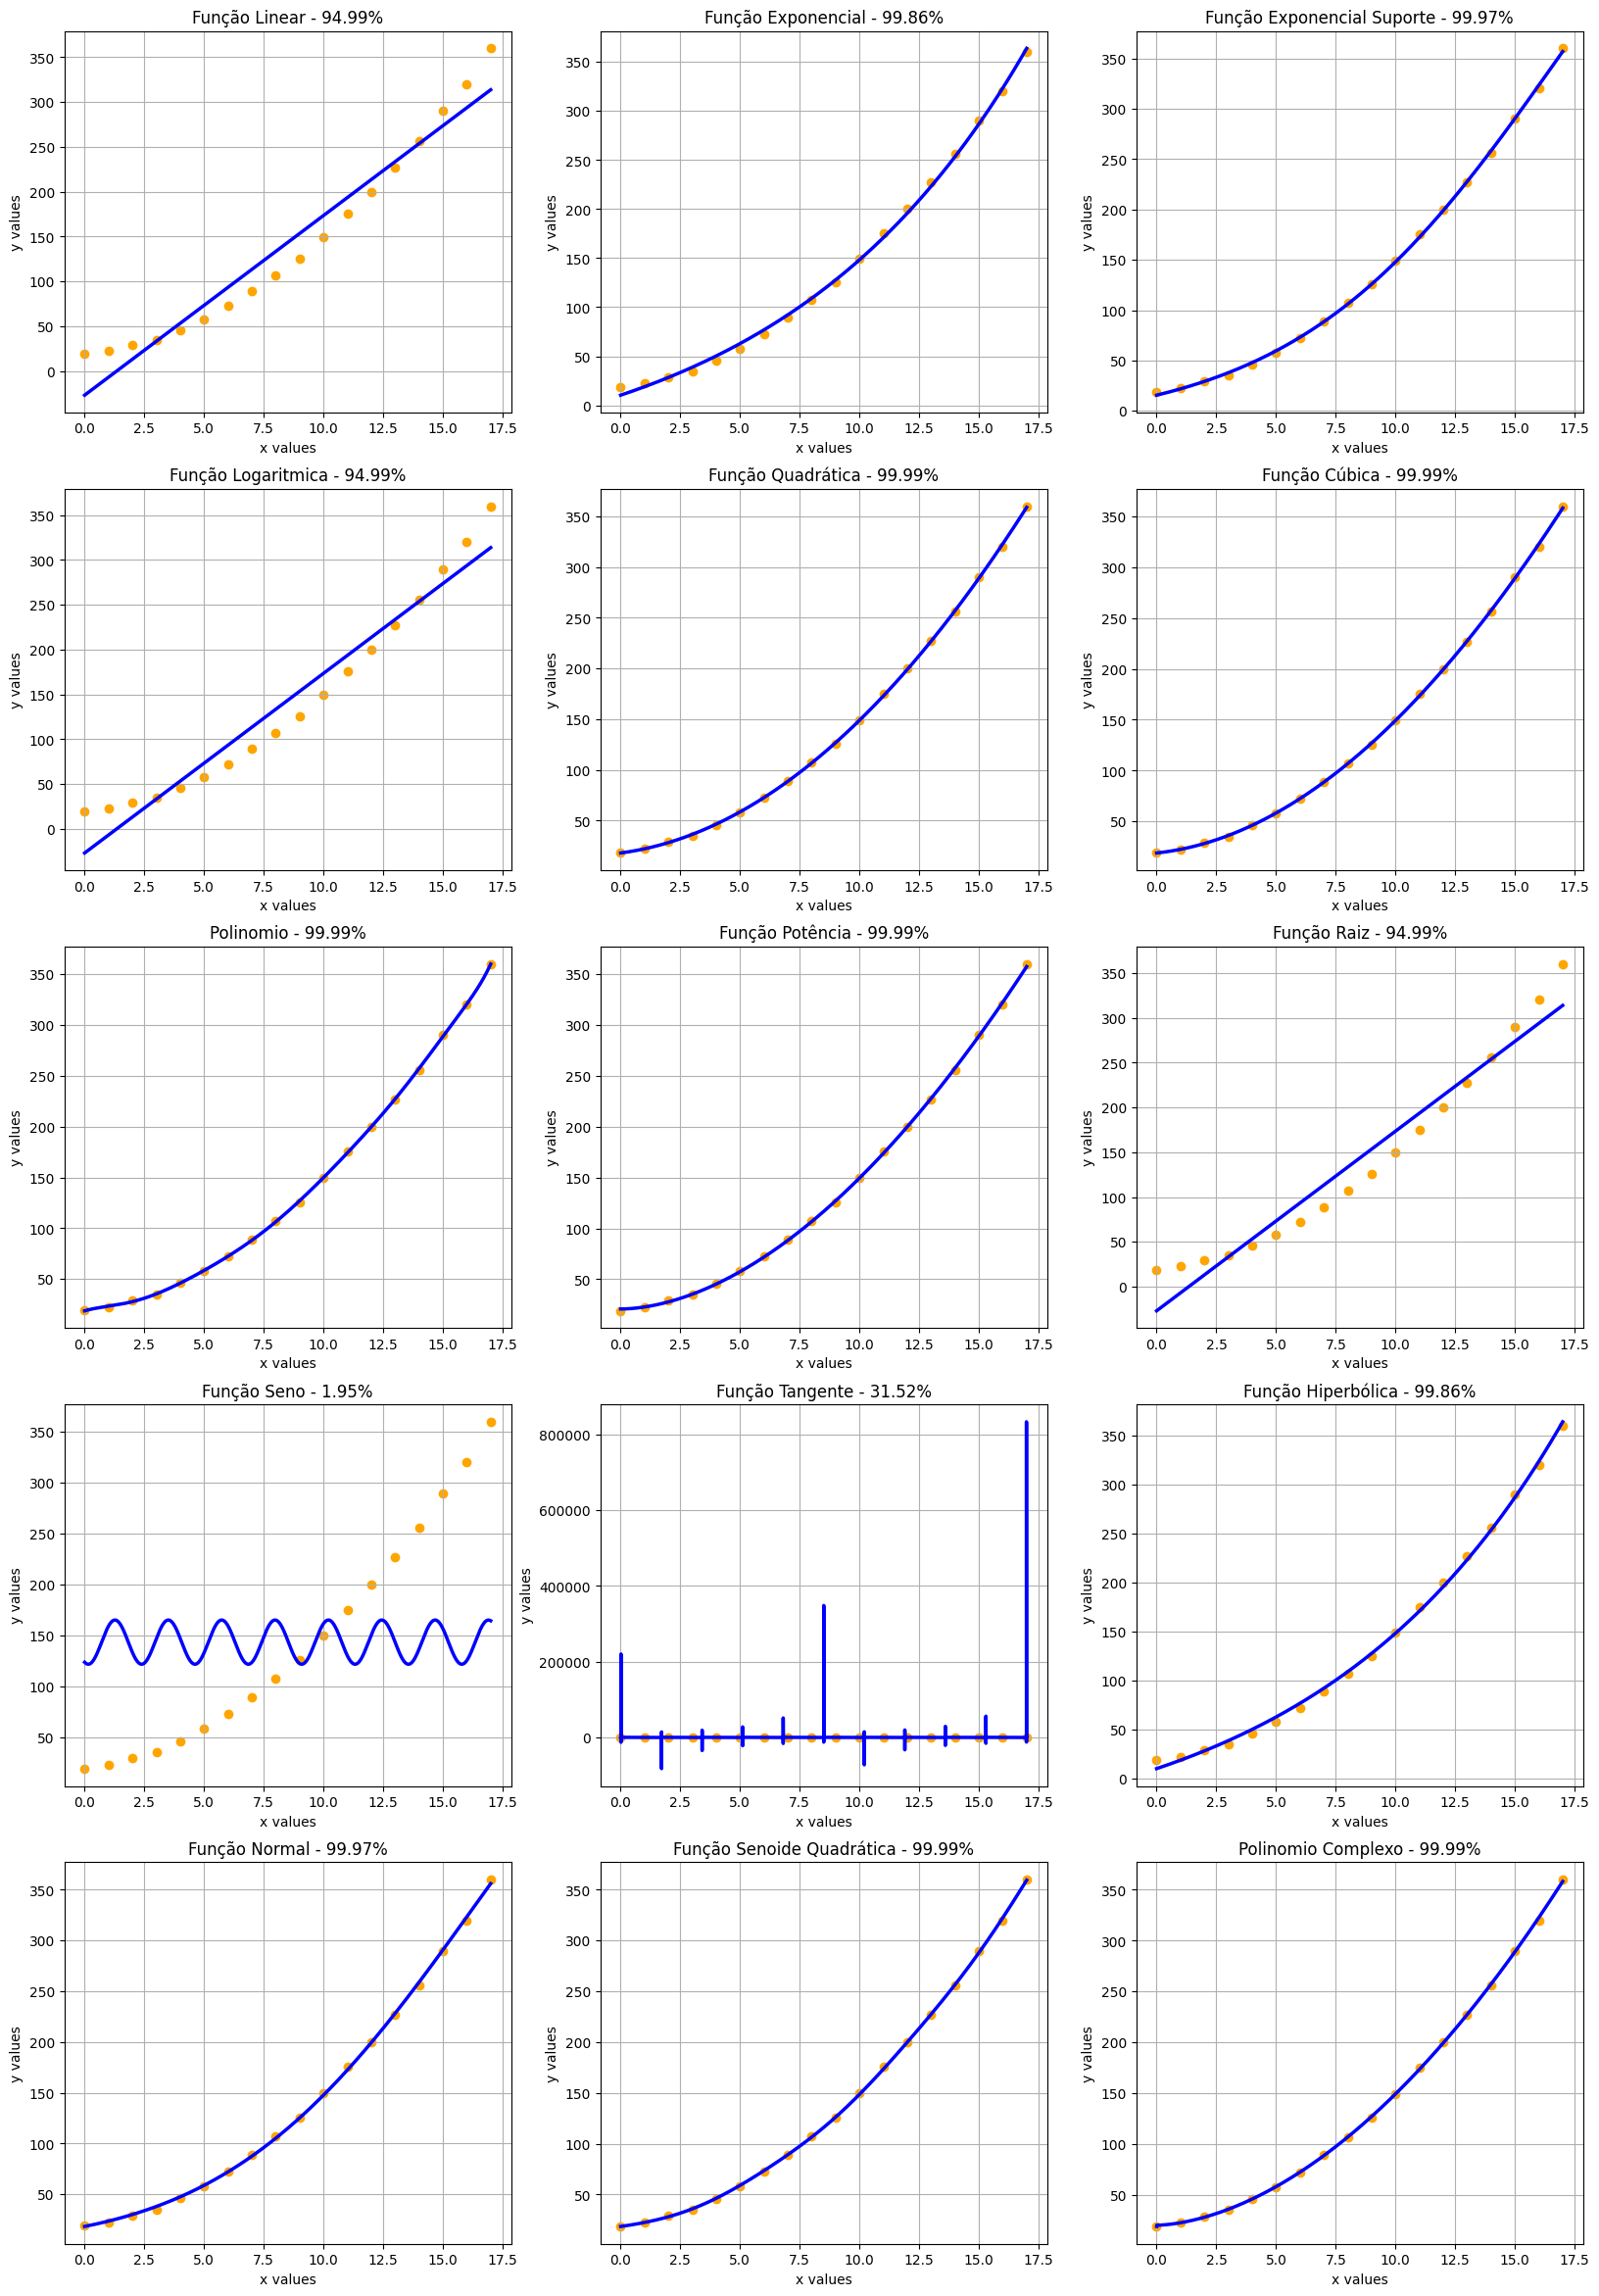

In [14]:
plotAllFunctions(xData, yData)

# ESCOLHENDO O IDEAL

COEFICIENTES:  [20.043240454117903, -26.973099415265658]
CONFIABILIDADE: 94.992707%


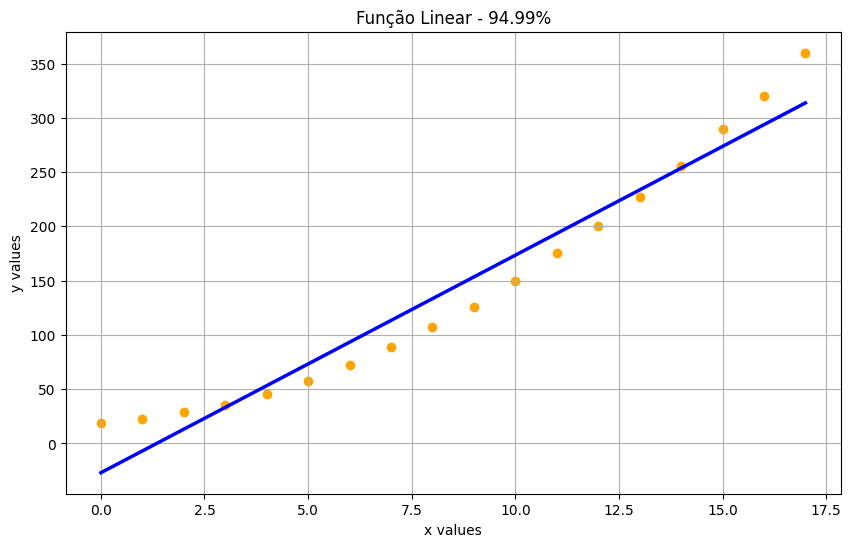

In [15]:
functions = testFunctions()
desired  = 'Função Linear'

function = functions[desired] 
coef     = curveFit(xData, yData, function)
prec     = getFitPrecision(xData, yData, function, coef)

print('COEFICIENTES: ', coef)
print(f'CONFIABILIDADE: {prec*100:.6f}%')

plt.figure(figsize=(10, 6))
plotFunction(xData, yData, function, desired)